<a href="https://colab.research.google.com/github/gautambat/Math-Formula-Recognition/blob/master/Recg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K


In [ ]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [ ]:
model = Sequential()
depth=1
height=50
width=50
inputShape = (height, width, depth)
chanDim = -1
classes=384
# if we are using "channels first", update the input shape
# and channels dimension
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
# CONV => RELU => POOL
model.add(Conv2D(32, (2, 2), input_shape = inputShape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(classes)) 
model.add(Activation('softmax'))


In [ ]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]  
for o in outputs:
  print(o)        
print(inp)

Tensor("conv2d_3/BiasAdd_4:0", shape=(None, 49, 49, 32), dtype=float32)
Tensor("activation_5/Relu_4:0", shape=(None, 49, 49, 32), dtype=float32)
Tensor("max_pooling2d_3/MaxPool_4:0", shape=(None, 24, 24, 32), dtype=float32)
Tensor("conv2d_4/BiasAdd_4:0", shape=(None, 23, 23, 32), dtype=float32)
Tensor("activation_6/Relu_4:0", shape=(None, 23, 23, 32), dtype=float32)
Tensor("max_pooling2d_4/MaxPool_4:0", shape=(None, 11, 11, 32), dtype=float32)
Tensor("conv2d_5/BiasAdd_4:0", shape=(None, 10, 10, 64), dtype=float32)
Tensor("activation_7/Relu_4:0", shape=(None, 10, 10, 64), dtype=float32)
Tensor("max_pooling2d_5/MaxPool_4:0", shape=(None, 5, 5, 64), dtype=float32)
Tensor("flatten_1/Reshape_4:0", shape=(None, 1600), dtype=float32)
Tensor("dense_2/BiasAdd_4:0", shape=(None, 64), dtype=float32)
Tensor("activation_8/Relu_4:0", shape=(None, 64), dtype=float32)
Tensor("dropout_1/cond_4/Identity:0", shape=(None, 64), dtype=float32)
Tensor("dense_3/BiasAdd_4:0", shape=(None, 384), dtype=float32)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import numpy as np
DATA_PATH = "/content/drive/My Drive/BTP"
infile = open(DATA_PATH+'/trainB900','rb')
db = pickle.load(infile)
print(len(db))


86400


In [ ]:
x=[np.reshape(k['features'],(50,50,1)) for k in db]
y=[k['label'] for k in db]
x=np.array(x)
y=np.array(y)
print(x.shape,y.shape)

(86400, 50, 50, 1) (86400, 96)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(xT/255,yT,epochs=5,batch_size=32)

Epoch 1/5
935/935 [==============================] - 54s 58ms/step - loss: 1.4848 - accuracy: 0.6017
Epoch 2/5
935/935 [==============================] - 55s 59ms/step - loss: 0.9009 - accuracy: 0.7254
Epoch 3/5
935/935 [==============================] - 54s 58ms/step - loss: 0.7809 - accuracy: 0.7583
Epoch 4/5
935/935 [==============================] - 54s 57ms/step - loss: 0.7271 - accuracy: 0.7747
Epoch 5/5
935/935 [==============================] - 54s 57ms/step - loss: 0.6642 - accuracy: 0.7887


In [ ]:
DATA_PATH = "/content/drive/My Drive/BTP"
model=load_model(DATA_PATH+'/modelPrinted100')
pr=np.argmax(model.predict(xT),axis=1)
print(np.count_nonzero(pr==np.argmax(yT,axis=1))/len(yT))

0.9870616161278459


In [ ]:
DATA_PATH = "/content/drive/My Drive/BTP"
model.save(DATA_PATH+'/modelPrinted100')

INFO:tensorflow:Assets written to: /content/drive/My Drive/BTP/modelPrinted100/assets


In [ ]:
def vert_sep(ov):
  sv=sorted(ov)
  # print(sv)
  space=0
  vertical=[]
  print(len(sv))
  while(len(sv)):
      t=sv.pop()
      c=True
      v=[t]
      tt=t[0]
      i=0
      lis=sorted(sv,key=lambda x:x[0]+x[2])
      while(len(lis) and lis[-1][0]+lis[-1][2]+space>tt):
          tt=min(tt,lis[-1][0])
          temp=lis.pop()
          sv.remove(temp)
          v.append(temp)
  #         print(t)
      vertical.append(v)
      print(v)
  return vertical

In [ ]:
def overlap(a,b):
    if (a[3]>b[3]) and (b[1]>a[1]) and (b[1]+b[3]<a[1]+a[3]):
      return 1
    if (a[3]<b[3]) and (b[1]<a[1]) and (b[1]+b[3]>a[1]+a[3]):
      return 1
    return (min(a[1]+a[3],b[1]+b[3])-max(a[1],b[1]))/max(a[3],b[3])
def merge_vert(vertical):
  con_Vert=[]
  for vi in vertical:
    i=0
    v=sorted(vi,key=lambda x:x[0])
    while(i<len(v)-1):
      j=i+1
      while(j<len(v)):
        if(overlap(v[i],v[j])>.39):
          t1=v[i]
          t2=v[j]
          a=min(t1[0],t2[0])
          b=min(t1[1],t2[1])
          c=max(t1[0]+t1[2],t2[0]+t2[2])-a
          d=max(t1[1]+t1[3],t2[1]+t2[3])-b
          if(t1[0]<t2[0]):
              e=t1[4]+' '+t2[4]
          else:
              e=t2[4]+' '+t1[4]    
          v[i]=(a,b,c,d,e)
          # v.remove(t1)
          v.remove(t2)  
          # v.append()
          j-=1
        j+=1
      i+=1
    print(v)
    con_Vert.append(v)     
  return con_Vert  
        

In [ ]:
def sup_sub(th1,th2,con_Vert):
  seg=[]
  for v in con_Vert:
      v1=[]
      v2=[]
      v3=[]
      for s in v:
          if s[1]>th2:
              v3.append(s)
          elif s[1]+s[3]<th1:
              v1.append(s)
          else:
              v2.append(s)
      seg.append([v1,v2,v3])
      print([v1,v2,v3])
  seg.reverse()     
  return seg

In [ ]:
def latex(s):
    ss=sorted(s,key=lambda x:x[1])
    if len(s)==3:
        if ss[1][4]=='-':
            return '\\frac{'+ss[0][4]+'}{'+ss[2][4]+'}'
        return ss[1][4]+'_{'+ss[2][4]+'}^{'+ss[0][4]+'}'
    if len(s)==2:
        if s[0][4]=='-':
          if s[1][4]=='-':
            return '='
          else:
            return 'fraction'
        if s[1][4]=='-':
          if s[0][4]=='-':
            return '='
          else:
            return 'fraction'
        return ss[1][4]+'^{'+ss[0][4]+'}'
    if len(s)==1:
        return s[0][4]
    return ''

def toText(seg):
  st=''
  for s in seg:
      s1=latex(s[0])
      s2=latex(s[1])
      s3=latex(s[2])
      if (s2=='-'):
        if s1=='-':
            st+=' = '
        elif s3=='-':
            st+=' = '
        elif s3 and s1:
            st+='\\frac{'+s1+'}{'+s3+'}'
        else:
            st+=s2 
      elif (s1=='-')and (s3=='-'):
        st+=' = '
      elif (s1=='fraction'):
        ss=sorted(s[0],key=lambda x:x[1])
        st+='\\frac{'+ss[0][4]+'}{'+s2+s3+'}'
      elif (s2=='fraction'):
        ss=sorted(s[1],key=lambda x:x[1])
        st+='\\frac{'+s1+'}{'+ss[1][4]+'}'
      elif s3=='fraction':
        ss=sorted(s[2],key=lambda x:x[1])
        st+='\\frac{'+s1+s2+'}{'+ss[1][4]+'}'
      else:
        if(s2):
            st+=s2
        if s1:
            st+='^{'+s1+'}'
        if s3:
            st+='_{'+s3+'}'
      
  return st
  # plt.rcParams["figure.figsize"]=(5,5)
  # plt.plot()
  # plt.text(0.5, 0.5,'$%s$'%st,size=70)
  # plt.show()
      
        

In [ ]:
def getText(ov,th1,th2):
  vertical=vert_sep(ov)
  con_Vert=merge_vert(vertical)
  seg=sup_sub(th1,th2,con_Vert)
  st=toText(seg) 
  print(st)
  return st


      

In [ ]:

dir='/content/drive/My Drive/BTP/InftyCDB-3-A/'
DATA_PATH = "/content/drive/My Drive/BTP"
idir=dir+'images/'
# code=[cd.split(',') for cd in open('symbol/InftyCDB-3_new/OcrCodeList.txt')]
code=pd.read_csv(dir+'OcrCodeList.txt',names=['code','type','char'])
file = pd.read_csv(dir+'CharInfoDB-3-A_Info.csv')
cc=pickle.load(open(dir+'cc200y','rb'))


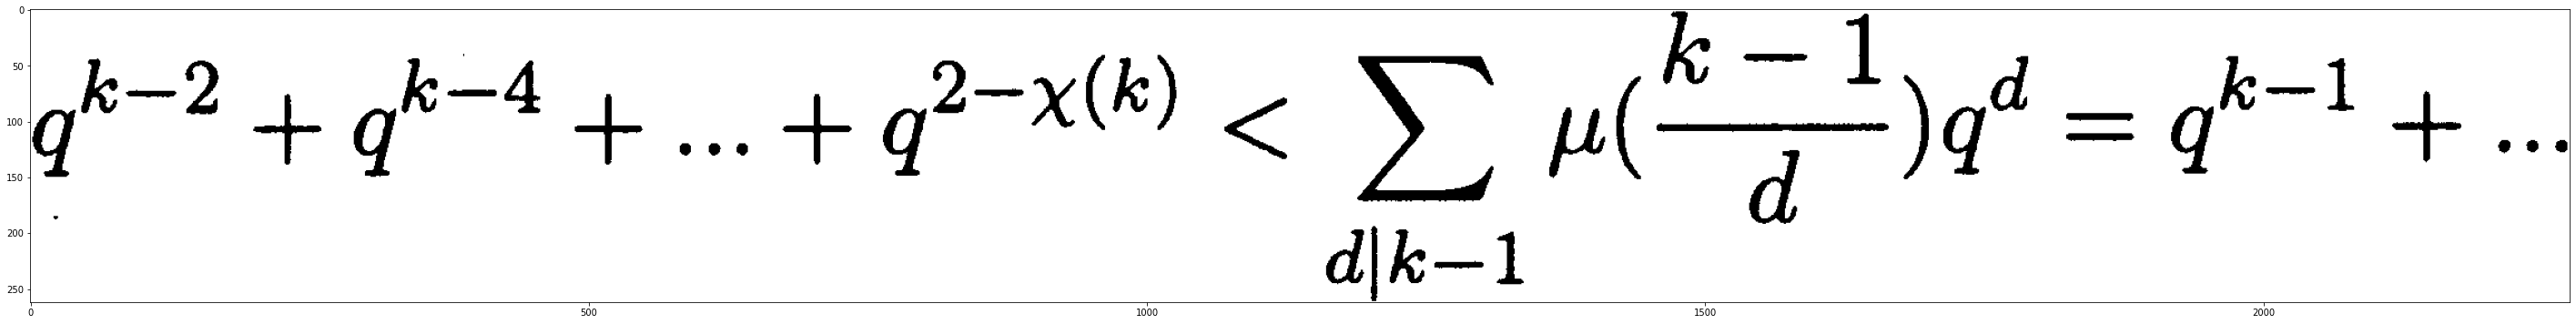

In [ ]:
from PIL import Image
gif = cv2.VideoCapture(DATA_PATH+"/img4319.gif")
ret,frame = gif.read() 
img = Image.fromarray(frame)
img = img.convert('RGB')
# print(np.array(img))
plt.rcParams["figure.figsize"]=(50,25)
plt.imshow(frame)
plt.show()

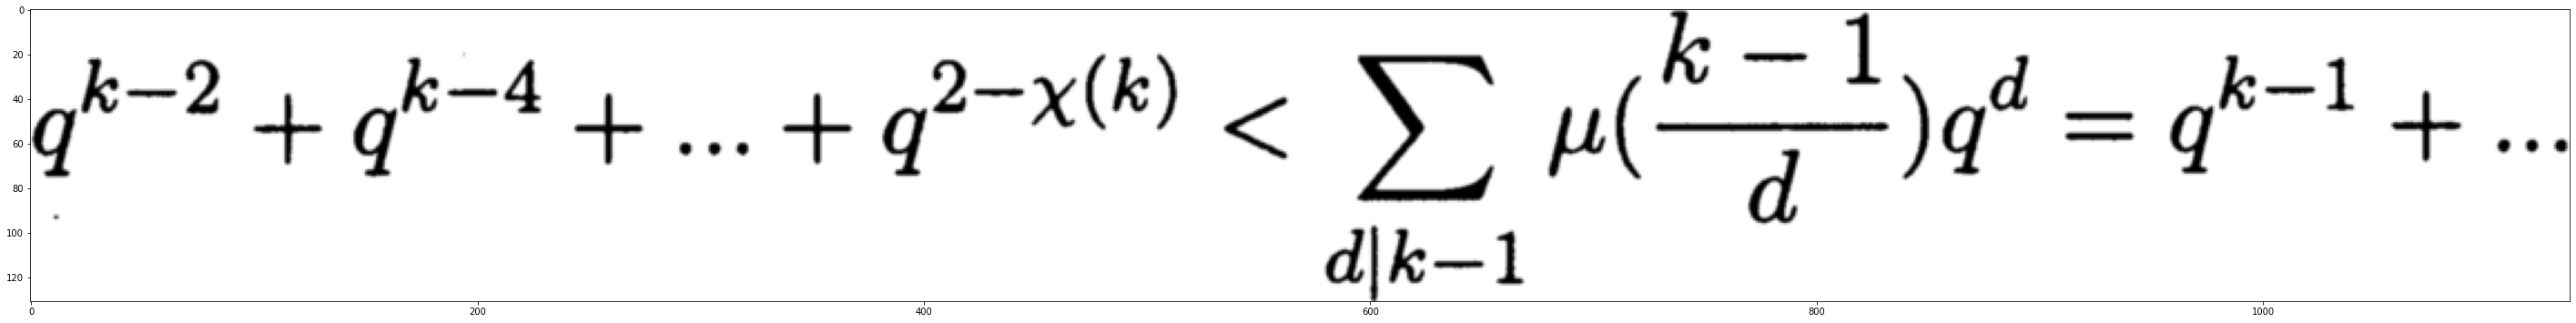

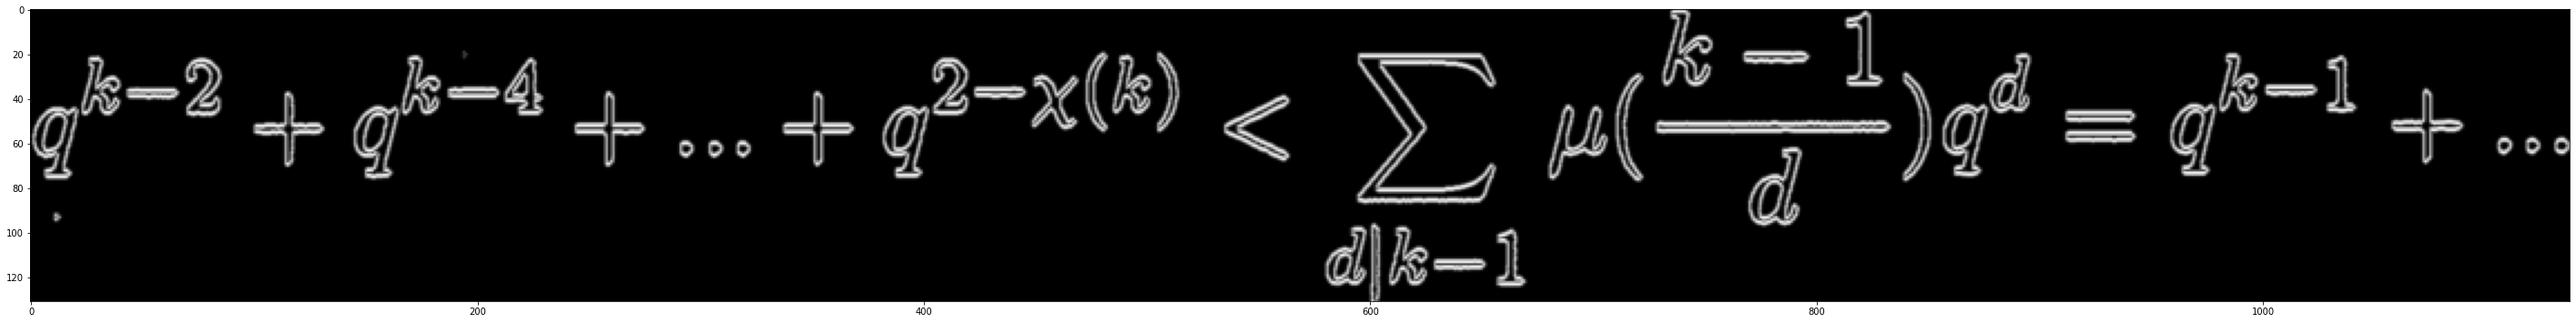

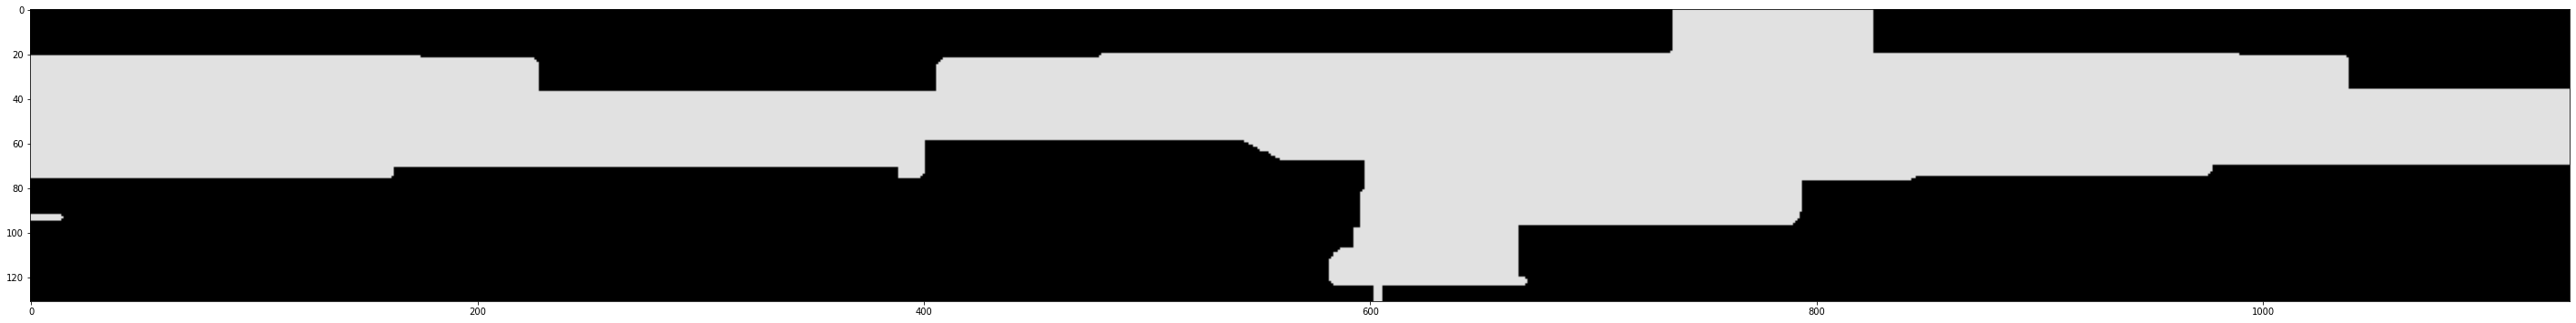

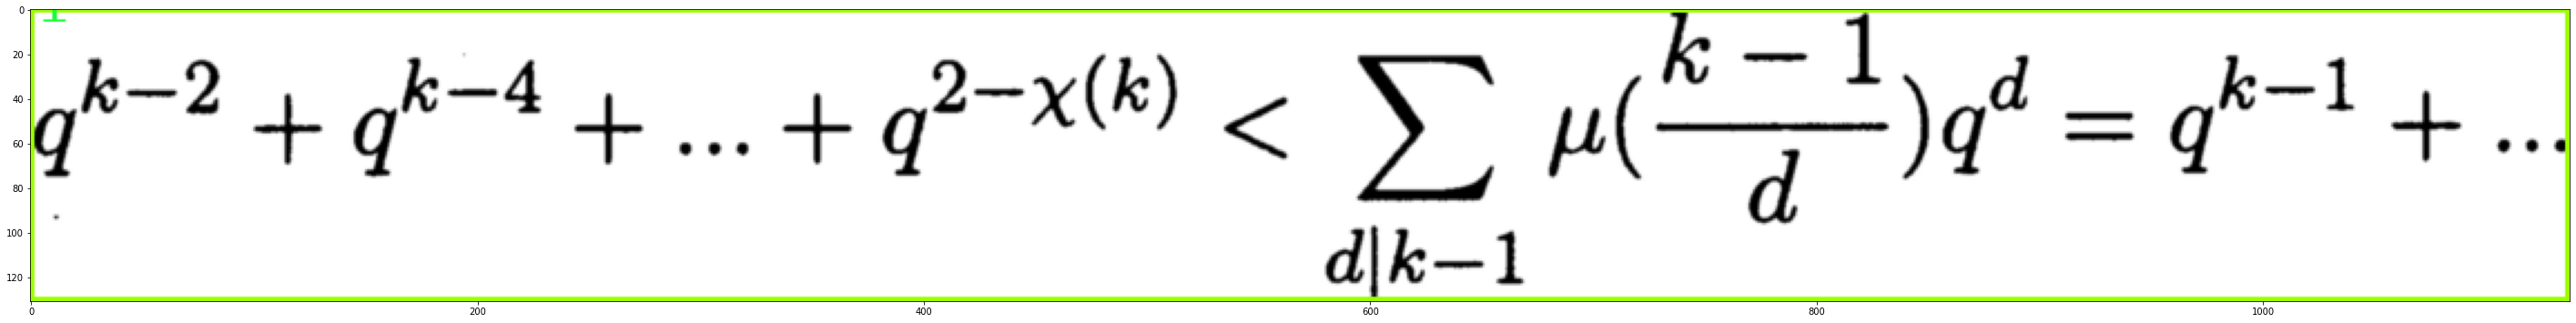

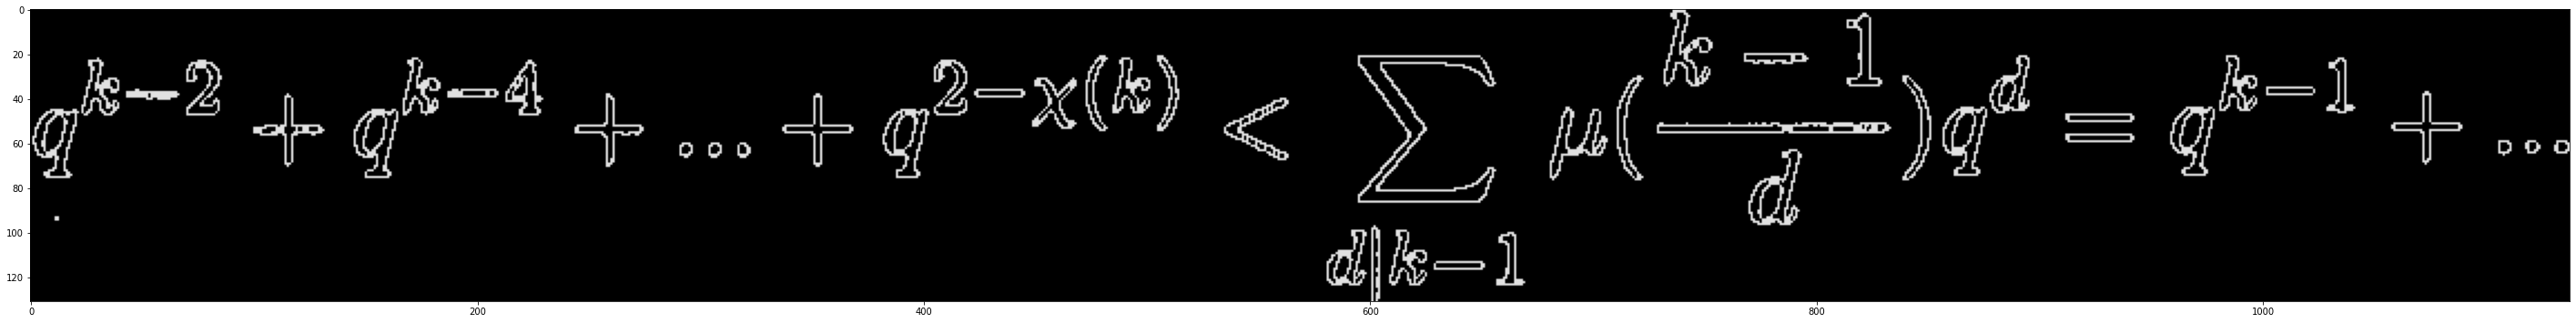

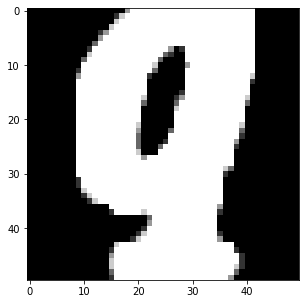

342 0x4171
q


ValueError: ignored

<Figure size 720x360 with 1 Axes>

166 0x1894
\blacksquare 


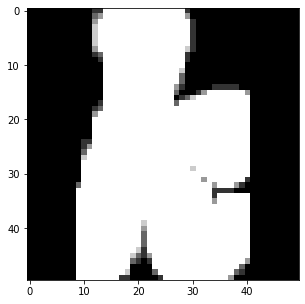

336 0x416b
k


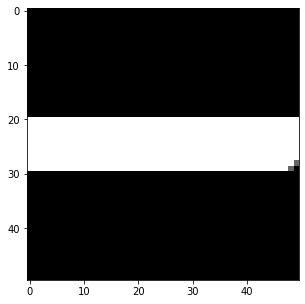

213 0x1c2d
-


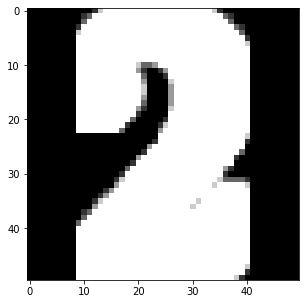

2 0x0132
2


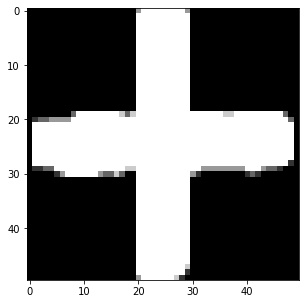

212 0x1c2b
+


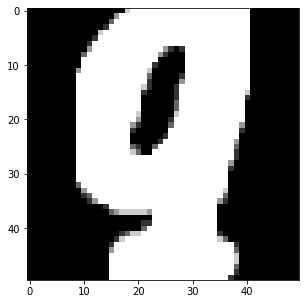

52 0x0171
q


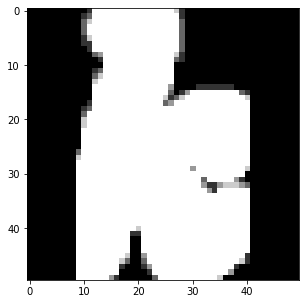

336 0x416b
k


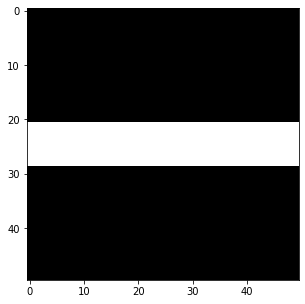

213 0x1c2d
-


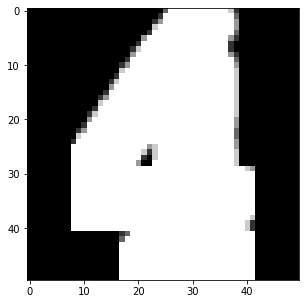

4 0x0134
4


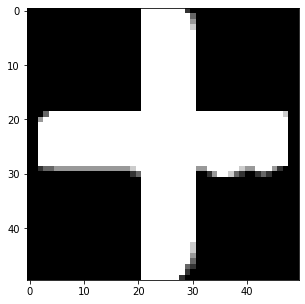

212 0x1c2b
+


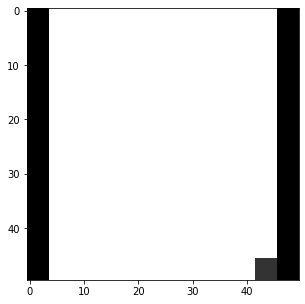

139 0x142e
.


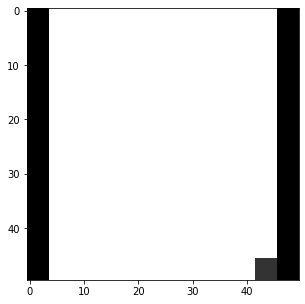

139 0x142e
.


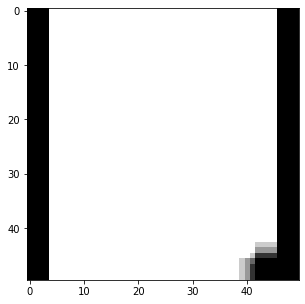

139 0x142e
.


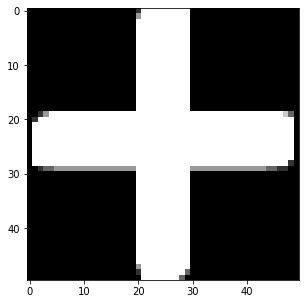

212 0x1c2b
+


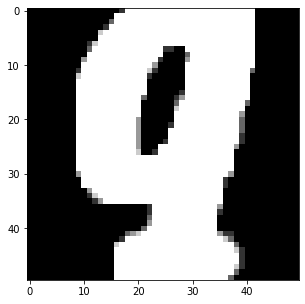

52 0x0171
q


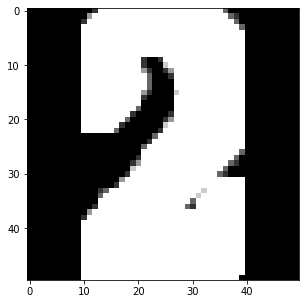

2 0x0132
2


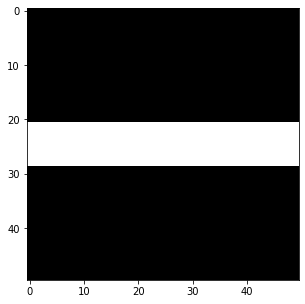

213 0x1c2d
-


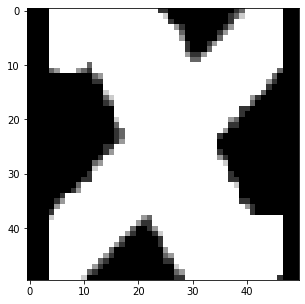

372 0x4276
\chi 


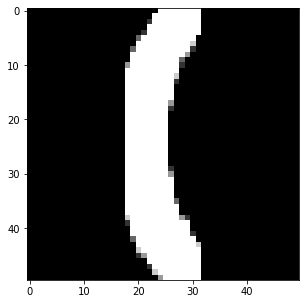

174 0x1980
(


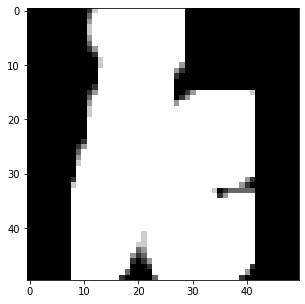

336 0x416b
k


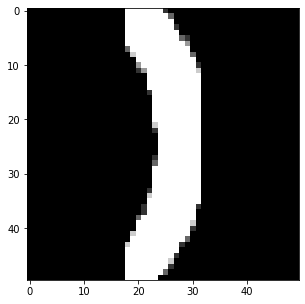

175 0x1981
)


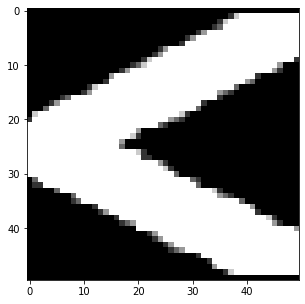

230 0x1d3c
<


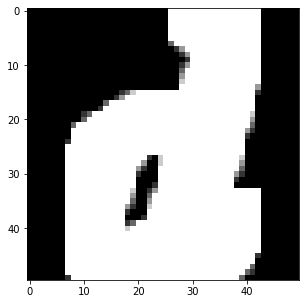

329 0x4164
d


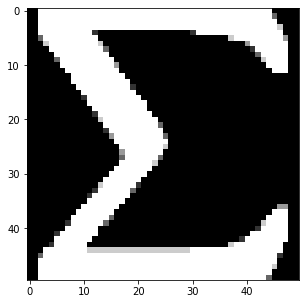

75 0x0252
\Sigma 


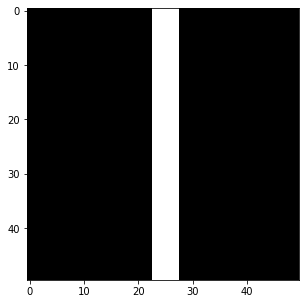

173 0x197c
|


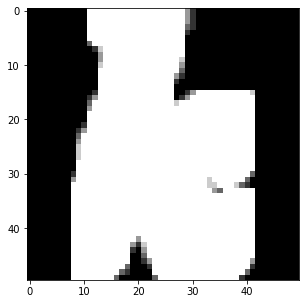

336 0x416b
k


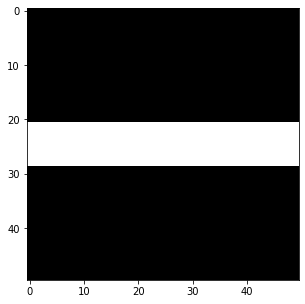

213 0x1c2d
-


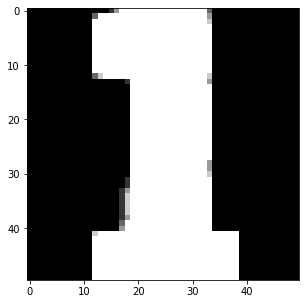

1 0x0131
1


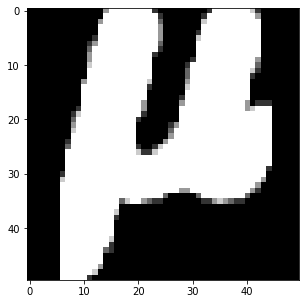

364 0x426c
\mu 


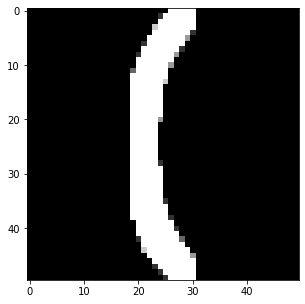

174 0x1980
(


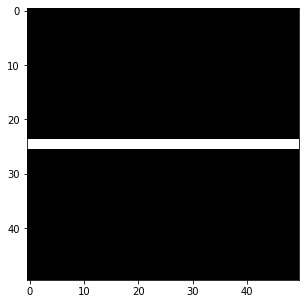

213 0x1c2d
-


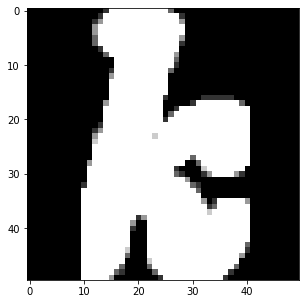

336 0x416b
k


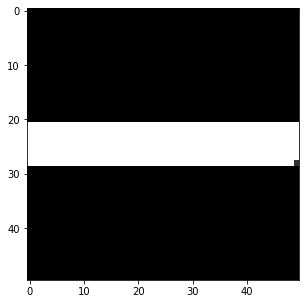

213 0x1c2d
-


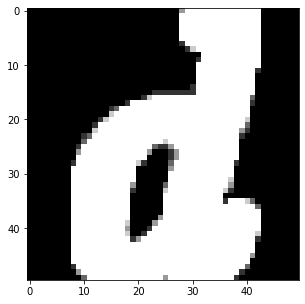

329 0x4164
d


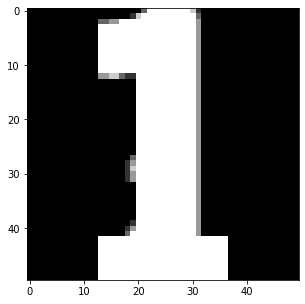

1 0x0131
1


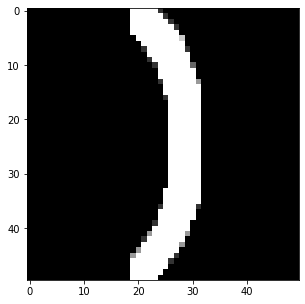

175 0x1981
)


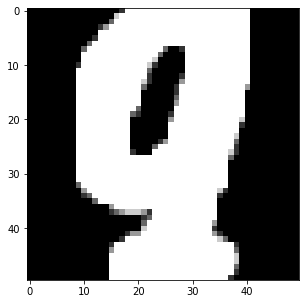

52 0x0171
q


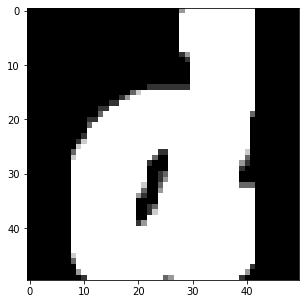

329 0x4164
d


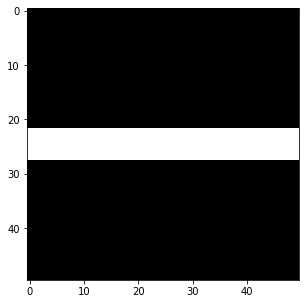

213 0x1c2d
-


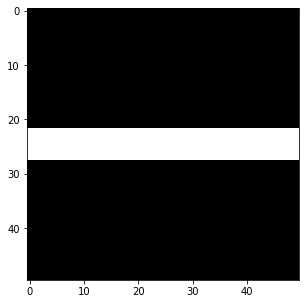

213 0x1c2d
-


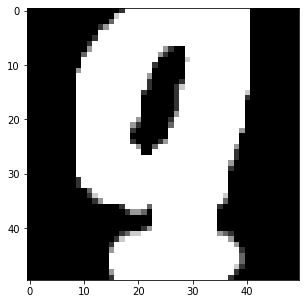

52 0x0171
q


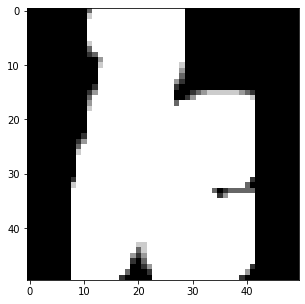

336 0x416b
k


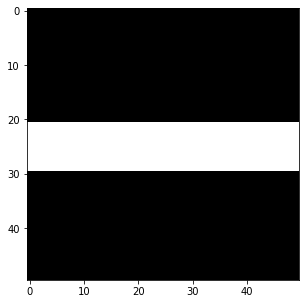

213 0x1c2d
-


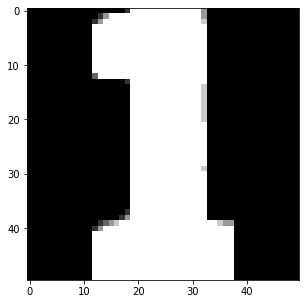

1 0x0131
1


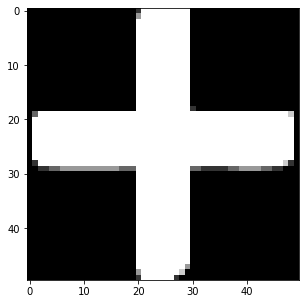

212 0x1c2b
+


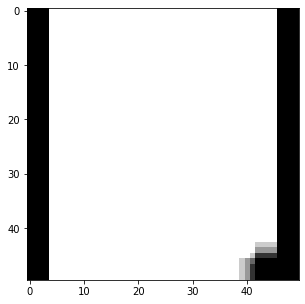

139 0x142e
.


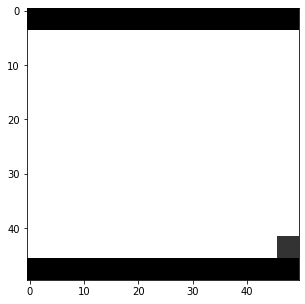

139 0x142e
.


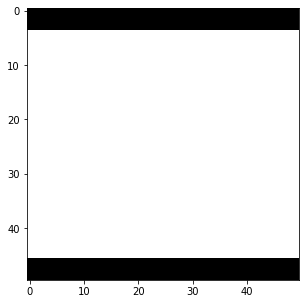

139 0x142e
.


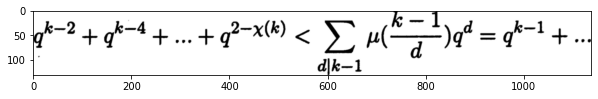

49
[(1131, 59, 7, 6, '.')]
[(1118, 59, 7, 6, '.')]
[(1106, 59, 6, 7, '.')]
[(1058, 37, 32, 33, '+')]
[(1029, 22, 13, 25, '1')]
[(1002, 35, 22, 4, '-')]
[(981, 21, 17, 25, 'k')]
[(959, 44, 20, 31, 'q')]
[(912, 56, 31, 4, '-'), (912, 47, 31, 4, '-')]
[(878, 21, 18, 26, 'd')]
[(857, 44, 20, 31, 'q')]
[(839, 30, 13, 47, ')')]
[(814, 2, 16, 33, '1'), (729, 51, 105, 5, '-'), (768, 20, 29, 5, '-'), (770, 63, 24, 34, 'd'), (732, 0, 22, 35, 'k')]
[(711, 30, 12, 47, '(')]
[(681, 44, 26, 33, '\\mu ')]
[(657, 100, 13, 24, '1')]
[(629, 113, 23, 4, '-'), (595, 21, 62, 66, '\\Sigma '), (609, 99, 17, 25, 'k'), (601, 97, 4, 34, '|'), (581, 99, 18, 25, 'd')]
[(535, 40, 29, 28, '<')]
[(505, 21, 10, 34, ')')]
[(485, 22, 17, 25, 'k')]
[(473, 21, 10, 34, '(')]
[(449, 31, 20, 23, '\\chi ')]
[(423, 36, 23, 4, '-')]
[(405, 23, 15, 25, '2')]
[(382, 45, 21, 31, 'q')]
[(337, 38, 32, 33, '+')]
[(317, 60, 6, 7, '.')]
[(304, 60, 6, 7, '.')]
[(291, 60, 6, 7, '.')]
[(244, 38, 31, 33, '+')]
[(213, 23, 17, 25, '4')]
[(1

In [ ]:
DATA_PATH = "/content/drive/My Drive/BTP"
model=load_model(DATA_PATH+'/modelPrinted100')
gif = cv2.VideoCapture(DATA_PATH+"/img4319.gif") #4319 , 4366 FEB, 0019 Esub, 4350 I, 4351 I, 0011, 0015 Arrow, 4384 Bsub, 2929,  4386 
ret,frame = gif.read() # ret=True if it finds a frame else False.
imx = Image.fromarray(frame)
im = np.array(imx.convert('RGB'))
# im = cv2.imread(DATA_PATH+"/img2929.gif")
im = cv2.pyrDown(im)
height,width,_=im.shape
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(imgray, cv2.COLOR_BGR2RGB))
plt.show()
im2=imgray.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,3))
grad = cv2.morphologyEx(imgray,cv2.MORPH_GRADIENT,kernel)
plt.imshow(cv2.cvtColor(grad, cv2.COLOR_BGR2RGB))
plt.show()
ret,thresh = cv2.threshold(grad.copy(),0.0,225.0,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(width//8,height//10))
connected = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
mask = np.zeros(thresh.shape, dtype=np.uint8)
plt.imshow(cv2.cvtColor(connected, cv2.COLOR_BGR2RGB))
plt.show()
lines=[]
for idx in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[idx])
    mask[y:y+h,x:x+w] = 0
    cv2.drawContours(mask,contours,idx,(255,255,255),-1)
    r = float(cv2.countNonZero(mask[y:y+h,x:x+w]))/(w*h)
    if r>0.25 and w>20 and h>8:
        lines.append((x,y,w,h))
        cv2.rectangle(im,(x,y),(x+w-1,y+h-1),(0,255,156),2)
        cv2.putText(im,str(idx),(x,y+5),cv2.FONT_HERSHEY_COMPLEX,1,(50,255,25),1)

plt.rcParams["figure.figsize"]=(50,25)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
# im2 = cv2.morphologyEx(im2,cv2.MORPH_CLOSE,kernel)
im2 = cv2.erode(im2,kernel)
ret,thresh = cv2.threshold(grad,215,225.0,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,2))
con2 = cv2.morphologyEx(thresh.copy(),cv2.MORPH_CLOSE,kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,2))
con2 = cv2.erode(thresh,kernel)
# con2 = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)
lines.reverse()
plt.imshow(cv2.cvtColor(con2, cv2.COLOR_BGR2RGB))
plt.show()
i=0
classes = code.to_numpy()
classes[610][2]=','
ov=[]

for l in lines: 
    lat=''
    x,y,w,h=l
    th1=h*.55
    th2=h*.52
    img = im2[y:y+h,x:x+w]
    th = con2[y:y+h,x:x+w]
    cont,_ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    rect=[cv2.boundingRect(c) for c in cont]
    rect.sort()
    for c in rect:
        # break
        x,y,w,h = c
        ixx=img[y:y+h,x:x+w]
        thx=th[y:y+h,x:x+w]
        # lat+=getText(ixx,thx,h)
        # cv2.rectangle(img,(x,y),(x+w-1,y+h-1),(0,255,156),2)
        r=h/w
        hi=50
        wi=50
        if h>w:
            wi=int(hi/r)
        else:
            hi=int(wi*r)
        ix = cv2.resize(ixx,(wi,hi))
        iz= np.zeros((50,50))
        u=25-hi//2
        l=25-wi//2
        iz[u:u+hi,l:l+wi]=~ix
        i1d=np.reshape(iz/255,(1,50,50,1))
        plt.rcParams["figure.figsize"]=(10,5)
        plt.imshow(iz,cmap='gray',vmax=5)
        plt.show()
        pr=np.argmax(model.predict(i1d)[0])
        # print(classes[pr] )
        print(pr, cc[pr])
        p=np.where(code['code']==cc[pr])[0][0]
        print(classes[p][2])
        ov.append((x,y,w,h,classes[p][2]))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    getText(ov,th1,th2)
    ov[:]=[]

In [ ]:
j=file.loc[file['code']=='1840']
print(j)
print(file['code'].nunique())
print(file)


            id  code  sheet    cx    cy  width  height
11553    11554  1840     20  2800  5400     52      55
82687    82688  1840    143  1600  3400     31      33
82688    82689  1840    143  1800  3400     31      33
82689    82690  1840    143  2000  3400     32      33
82690    82691  1840    143  2200  3400     32      33
...        ...   ...    ...   ...   ...    ...     ...
129651  129652  1840    224  2400  3200     38      43
130424  130425  1840    225  1000  5200     36      41
130425  130426  1840    225  1200  5200     36      41
130426  130427  1840    225  1400  5200     37      41
130427  130428  1840    225  1600  5200     37      41

[62 rows x 7 columns]
384
            id  code  sheet    cx    cy  width  height
0            1  0141      1   200   100     49      50
1            2  0141      1   400   100     49      49
2            3  0141      1   600   100     63      64
3            4  0141      1   800   100     48      49
4            5  0141      1  1000   10

In [ ]:

m=[0]*(60000)


In [ ]:
m1=[0]*55000

In [ ]:

# cc=code.to_numpy()
train=[]
for j in range(188752):
    c=file['code'][j]
    if m1[int(c,16)]>=100:
      continue
    m1[int(c,16)]+=1
    x=file['cx'][j]
    y=file['cy'][j]
    w=file['width'][j]
    h=file['height'][j]
    r=h/w
    hi=50
    wi=50
    if h>w:
        wi=int(hi/r)
    else:
        hi=int(wi*r)
    
    im=cv2.imread(idir+str(file['sheet'][j])+'.png')
    crp=im[y:y+h,x:x+w]
    gr=cv2.cvtColor(crp,cv2.COLOR_BGR2GRAY)
    ix = cv2.resize(gr,(wi,hi))
    iz= np.zeros((50,50))
    u=25-hi//2
    l=25-wi//2
    iz[u:u+hi,l:l+wi]= ~ix
    # p=np.where(code['code']=='0x'+str(c))[0]
    # print(p)
    # print(c)
    # fl='/content/drive/My Drive/BTP/InftyCDB-3-A/extract/0x'+c
    fl='0x'+c
    # os.makedirs(fl,exist_ok=True)
    # cv2.imwrite(fl+'/'+str(j)+'.jpg',iz)
    train.append({'im':iz,'code':fl})
    # plt.imshow(iz,cmap='gray')
    # plt.show()
    # print(iz)
    # break
print(len(train))
pickle.dump(train,open(dir+'trainPrinted200','wb'),protocol=2)

29911


In [ ]:
print(np.count_nonzero(np.array(m)))
print(len(train))

127
29911


In [ ]:
fT = open(dir+'trainPrinted200','rb')
db = pickle.load(fT)
print(len(db))
cc=set()
for d in db:
  cc.add(d['code'])
print(len(cc))
cc=list(cc)
cc.sort()

29911
384


In [ ]:
print(cc)
pickle.dump(cc,open(dir+'cc200y','wb'),protocol=2)

['0x0130', '0x0131', '0x0132', '0x0133', '0x0134', '0x0135', '0x0136', '0x0137', '0x0138', '0x0139', '0x0141', '0x0142', '0x0143', '0x0144', '0x0145', '0x0146', '0x0147', '0x0148', '0x0149', '0x014a', '0x014b', '0x014c', '0x014d', '0x014e', '0x014f', '0x0150', '0x0151', '0x0152', '0x0153', '0x0154', '0x0155', '0x0156', '0x0157', '0x0158', '0x0159', '0x015a', '0x0161', '0x0162', '0x0163', '0x0164', '0x0165', '0x0166', '0x0167', '0x0168', '0x0169', '0x016a', '0x016b', '0x016c', '0x016d', '0x016e', '0x016f', '0x0170', '0x0171', '0x0172', '0x0173', '0x0174', '0x0175', '0x0176', '0x0177', '0x0178', '0x0179', '0x017a', '0x01c5', '0x01c9', '0x01d3', '0x01d4', '0x01e9', '0x01ea', '0x01f3', '0x0243', '0x0244', '0x0248', '0x024b', '0x024e', '0x0250', '0x0252', '0x0255', '0x0257', '0x0258', '0x0441', '0x0442', '0x0443', '0x0444', '0x0445', '0x0446', '0x0447', '0x0448', '0x0449', '0x044a', '0x044b', '0x044c', '0x044d', '0x044e', '0x044f', '0x0450', '0x0451', '0x0452', '0x0453', '0x0454', '0x0455',

In [ ]:
for d in db:
  d['code']=cc.index(d['code'])

In [ ]:
pickle.dump(db,open(dir+'trainPrinted200y','wb'),protocol=2)

In [ ]:
db=pickle.load(open(dir+'trainPrinted200y','rb'))
xT=np.array([np.reshape(d['im'],(50,50,1)) for d in db])
yT=np.array([d['code'] for d in db])
yT=np.eye(384)[yT]
# print(yT[1])

In [ ]:
com=[0]*384
for d in db:
  com[d['code']]+=1
print(com)


[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1, 1, 1, 1, 26, 1, 2, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 30, 60, 92, 41, 30, 74, 40, 41, 30, 30, 27, 32, 58, 22, 68, 33, 25, 49, 61, 38, 29, 39, 37, 39, 30, 29, 56, 30, 100, 35, 64, 58, 30, 29, 30, 30, 34, 32, 35, 89, 28, 62, 58, 100, 29, 36, 30, 35, 30, 30, 30, 100, 30, 30, 100, 100, 100, 100, 30, 100, 100, 100, 100, 95, 100, 100, 100, 67, 98, 100, 62, 30, 100, 100, 100, 46, 50, 100, 12, 100, 100, 100, 100, 100, 100, 100, 100, 59, 100, 100, 38, 96, 5, 58, 100, 100, 100, 100, 100, 100, 100, 30, 30, 39, 58, 44, 44, 11, 10, 100, 100, 100, 100, 100, 100, 30, 100, 100, 100, 100, 100, 100, 100, 100, 90, 90, 50, 74, 30, 30, 100, 100, 100, 100, 100, 100, 100, 100, 58, 100,